In [83]:
pip install river==0.21.0

Note: you may need to restart the kernel to use updated packages.


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
#import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy.stats import shapiro
#import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from river import metrics
import time

In [85]:
dfd =pd.read_csv("Desktop/projects/Ml_Edge_new_binary_da_Selected_Features.csv")

In [86]:
dfd = dfd.sample(frac=0.1)

In [87]:
X = dfd.drop(['Attack_label'],axis=1)
y = dfd['Attack_label']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, test_size = 0.8, shuffle=False,random_state = 0)

In [88]:
dfd.head(5)
print(dfd['Attack_label'].value_counts())

Attack_label
1    13327
0     2453
Name: count, dtype: int64


In [89]:
def adaptive_learning(model, X_train, y_train, X_test, y_test):
    metric = metrics.Accuracy() # Use accuracy as the metric
    i = 0 # count the number of evaluated data points
    t = [] # record the number of evaluated data points
    m = [] # record the real-time accuracy
    yt = [] # record all the true labels of the test set
    yp = [] # record all the predicted labels of the test set
    
    eddm = drift.binary.EDDM()
    #detector = EDDM()
    
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)  # Encode training labels
    y_test = le.transform(y_test)  # Encode test labels


    
    # Learn the training set
    for xi1, yi1 in zip(X_train.values, y_train): 
        xi = dict(zip(X_train.columns, xi1))   
        model.learn_one(xi, yi1) 

    # Predict the test set and perform drift detection
    for x_val, y_val in zip(X_test.values, y_test):
        x = dict(zip(X_test.columns, x_val))
        y_pred = (model.predict_one(x))  # Convert to nearest class label
  # Predict the test sample
        model.learn_one(x, y_val) # Learn the test sample
        metric.update(y_val, y_pred) # Update the real-time accuracy
        
        # Drift detection part
        val = 0
        
        if y_val != y_pred:
           val = 1 
           eddm.update(y_val)
        if eddm.drift_detected:
            print(f"Change detected at index {i}, input value: {y_val}")
            
           
        if eddm.warning_detected:
           print(f"Warning detected at index {i}")
        # Print samples every 80 iterations
        #if i % 80 == 0:
           # print(f"Sample {i}: True label: {y_val}, Predicted label: {y_pred}") 

        # Performance evaluation
        t.append(i)
        m.append(metric.get() * 100)
        yt.append(y_val)
        yp.append(y_pred)
        i += 1
        

    print("Accuracy: " + str(round(accuracy_score(yt, yp), 4) * 100) + "%")
    print("Precision: " + str(round(precision_score(yt, yp), 4) * 100) + "%")
    print("Recall: " + str(round(recall_score(yt, yp), 4) * 100) + "%")
    print("F1-score: " + str(round(f1_score(yt, yp), 4) * 100) + "%")

    return t, m

In [90]:
# Define a figure function that shows the real-time accuracy changes
def acc_fig(t, m, name):
    plt.rcParams.update({'font.size': 15})
    plt.figure(1,figsize=(10,6)) 
    sns.set_style("darkgrid")
    plt.clf() 
    #if m:  # Check if m is not empty
    plt.plot(t, m, '-b', label='Avg Accuracy: %.2f%%' % (m[-1]))

    #plt.plot(t,m,'-b',label='Avg Accuracy: %.2f%%'%(m[-1]))

    plt.legend(loc='best')
    plt.title(name+' on Farmflow dataset', fontsize=15)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy (%)')

    plt.draw()

In [91]:
from river import forest
from river import drift

Accuracy: 99.88%
Precision: 99.92999999999999%
Recall: 99.92%
F1-score: 99.92999999999999%
CPU times: total: 2.83 s
Wall time: 6.03 s


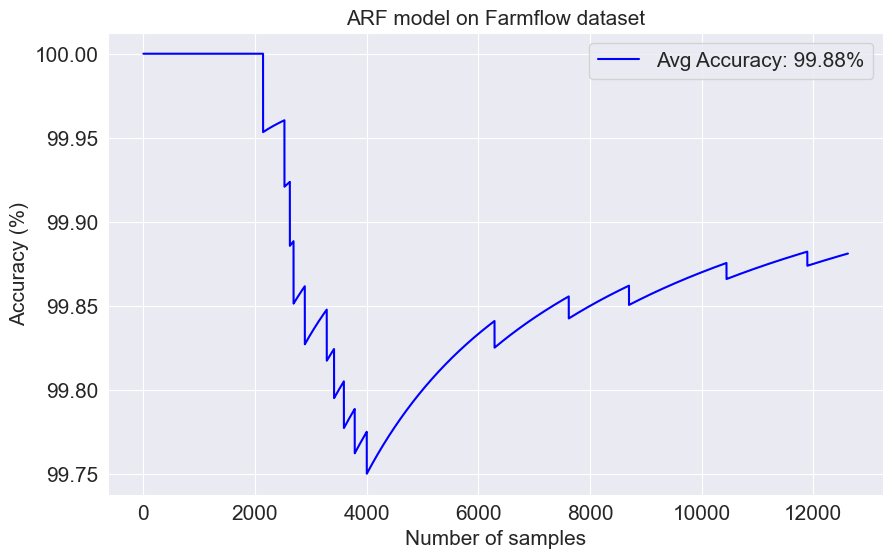

In [92]:
get_ipython().run_cell_magic('time', '', '# Use the Adaptive Random Forest (ARF) model with ADWIN drift detector as a baseline model\nname = "ARF model"\n\n\nmodel = drift.DriftRetrainingClassifier(\n    model=forest.ARFClassifier(n_models = 3,drift_detector=drift.binary.EDDM())\n    \n)\n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

Warning detected at index 1684
Warning detected at index 1685
Warning detected at index 1686
Warning detected at index 1687
Warning detected at index 1688
Warning detected at index 1689
Warning detected at index 1690
Warning detected at index 1691
Warning detected at index 1692
Warning detected at index 1693
Warning detected at index 1694
Warning detected at index 1695
Warning detected at index 1696
Warning detected at index 1697
Warning detected at index 1698
Warning detected at index 1699
Warning detected at index 1700
Warning detected at index 1701
Warning detected at index 1702
Warning detected at index 1703
Warning detected at index 1704
Warning detected at index 1705
Warning detected at index 1706
Warning detected at index 1707
Warning detected at index 1708
Warning detected at index 1709
Warning detected at index 1710
Warning detected at index 1711
Warning detected at index 1712
Warning detected at index 1713
Warning detected at index 1714
Warning detected at index 1715
Warning 

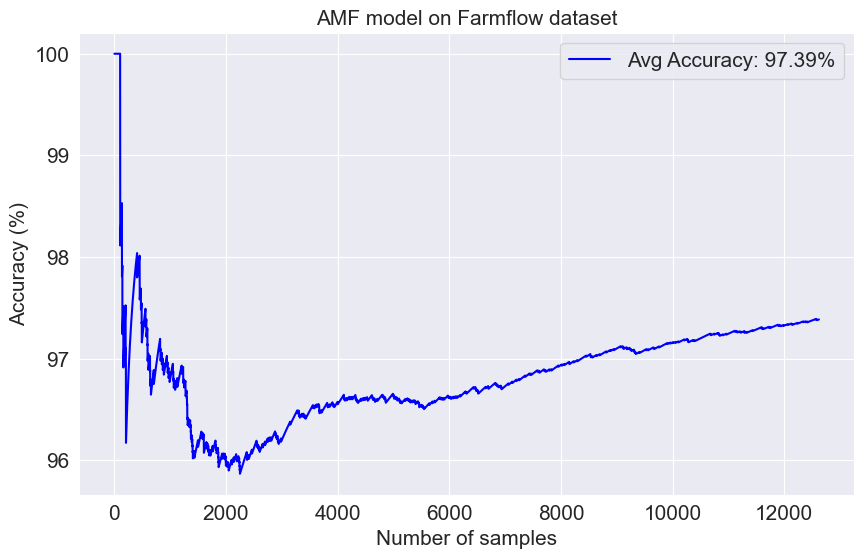

In [93]:
get_ipython().run_cell_magic('time', '', '# Use the Aggregated Mondrian Forest (AMF) model with ADWIN drift detector as a baseline model\nname = "AMF model"\n\n\nmodel=forest.AMFClassifier(n_estimators = 3,use_aggregation=True)\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

In [46]:
from river import tree

Accuracy: 98.98%
Precision: 98.99%
Recall: 99.81%
F1-score: 99.4%
CPU times: total: 3.94 s
Wall time: 7.11 s


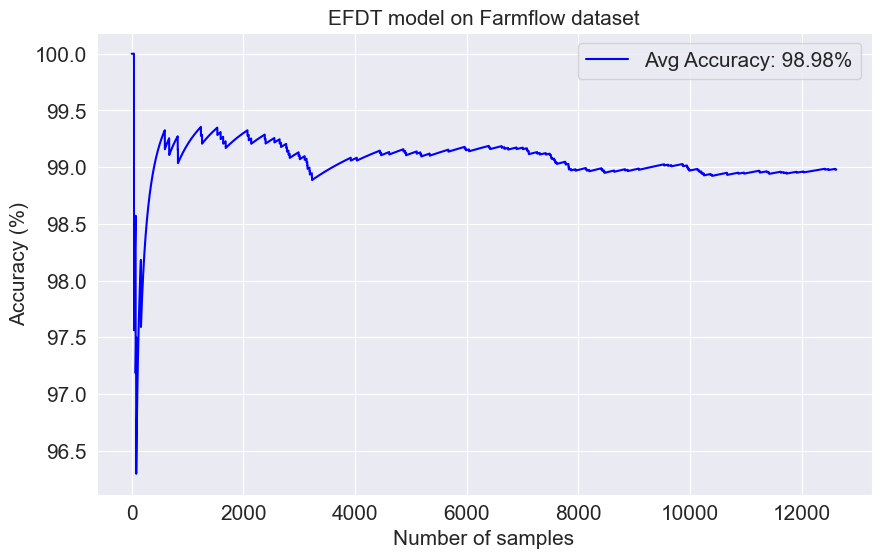

In [47]:
get_ipython().run_cell_magic('time', '', '# Use the Extremely Fast decision Tree (AMF) model with ADWIN drift detector as a baseline model\nname = "EFDT model"\n\n\nmodel=tree.ExtremelyFastDecisionTreeClassifier()\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

Accuracy: 99.22999999999999%
Precision: 99.1%
Recall: 100.0%
F1-score: 99.55000000000001%
CPU times: total: 1.95 s
Wall time: 3.94 s


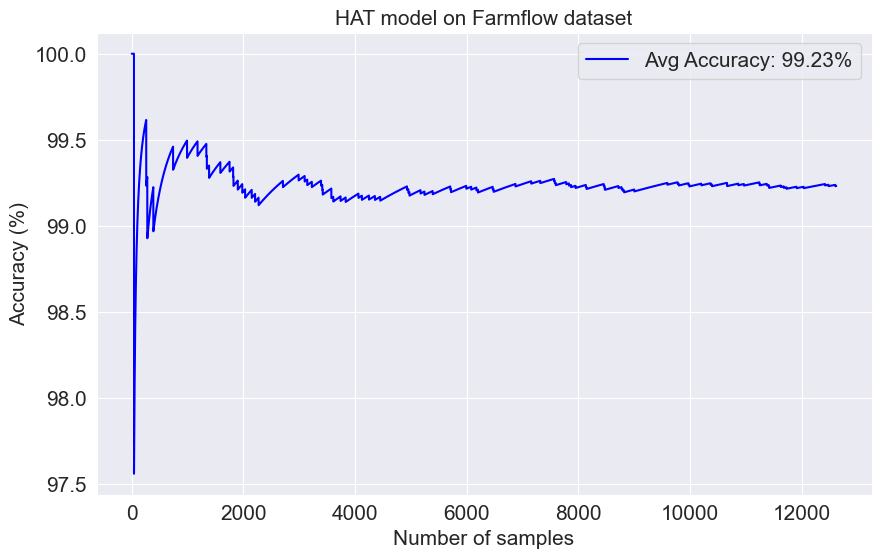

In [48]:
get_ipython().run_cell_magic('time', '', '# Use the Hoeffdinng Adaptive Tree model with ADWIN drift detector as a baseline model\nname = "HAT model"\n\n\nmodel = drift.DriftRetrainingClassifier(\n    model=tree.HoeffdingAdaptiveTreeClassifier(drift_detector=drift.binary.EDDM())\n    \n)\n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

Accuracy: 99.22999999999999%
Precision: 99.1%
Recall: 100.0%
F1-score: 99.55000000000001%
CPU times: total: 1.08 s
Wall time: 3.92 s


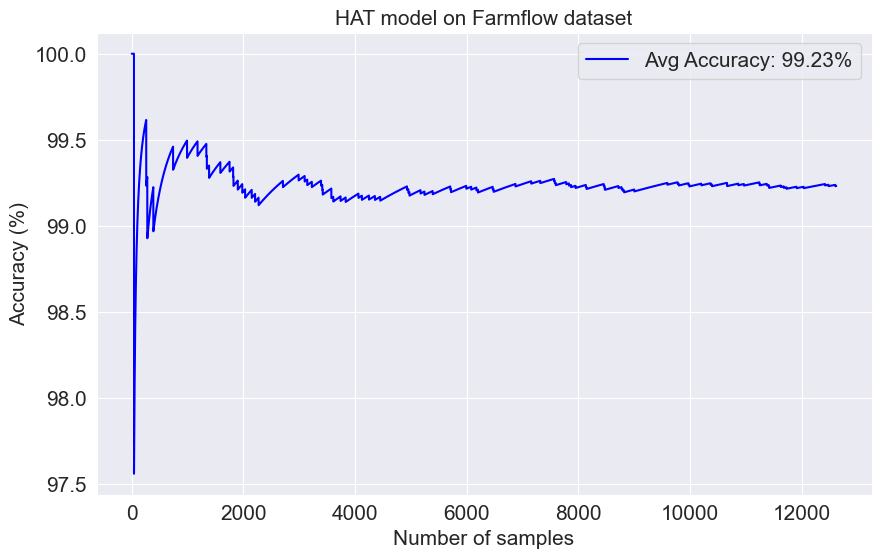

In [56]:
get_ipython().run_cell_magic('time', '', '# Use the Extremely Fast decision Tree (AMF) model with ADWIN drift detector as a baseline model\nname = "HAT model"\n\n\nmodel=tree.HoeffdingAdaptiveTreeClassifier()\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

Accuracy: 98.92999999999999%
Precision: 98.76%
Recall: 99.99%
F1-score: 99.37%
CPU times: total: 1.08 s
Wall time: 2.48 s


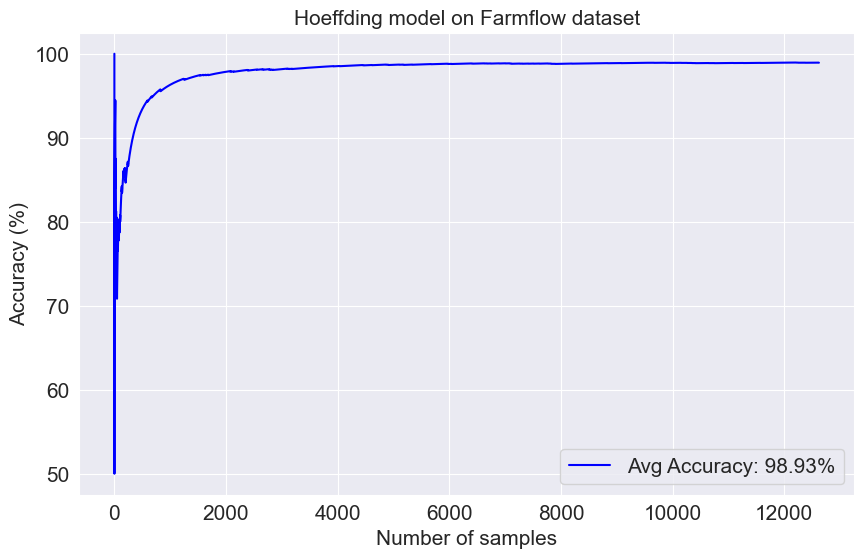

In [57]:
get_ipython().run_cell_magic('time', '', '# Use the Hoeffding Tree classifier model with ADWIN drift detector as a baseline model\nname = "Hoeffding model"\n\n\nmodel=tree.HoeffdingTreeClassifier()\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

In [58]:
from river import ensemble

Accuracy: 99.98%
Precision: 99.97%
Recall: 100.0%
F1-score: 99.99%
CPU times: total: 9.23 s
Wall time: 27.6 s


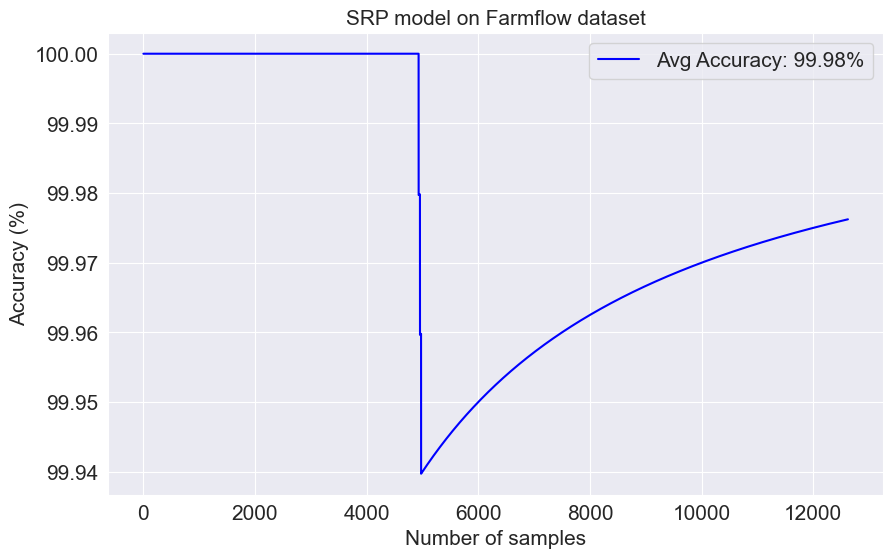

In [73]:
get_ipython().run_cell_magic('time', '', '# Use the Streaming Random Patches (SRP) model with ADWIN drift detector as a baseline model\nname = "SRP model"\n\n\nbase_model = tree.HoeffdingTreeClassifier()\n\nmodel = ensemble.SRPClassifier(\n    model=base_model, n_models=3, seed=42,\n)\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

In [74]:
from river import multiclass, linear_model

Warning detected at index 600
Warning detected at index 601
Warning detected at index 602
Warning detected at index 603
Warning detected at index 604
Warning detected at index 605
Warning detected at index 606
Warning detected at index 607
Warning detected at index 608
Warning detected at index 609
Warning detected at index 610
Warning detected at index 611
Warning detected at index 612
Warning detected at index 613
Warning detected at index 614
Warning detected at index 615
Warning detected at index 616
Warning detected at index 617
Warning detected at index 618
Warning detected at index 619
Warning detected at index 620
Warning detected at index 621
Warning detected at index 622
Warning detected at index 623
Warning detected at index 624
Warning detected at index 625
Warning detected at index 626
Warning detected at index 627
Warning detected at index 628
Warning detected at index 629
Warning detected at index 630
Warning detected at index 631
Warning detected at index 632
Warning de

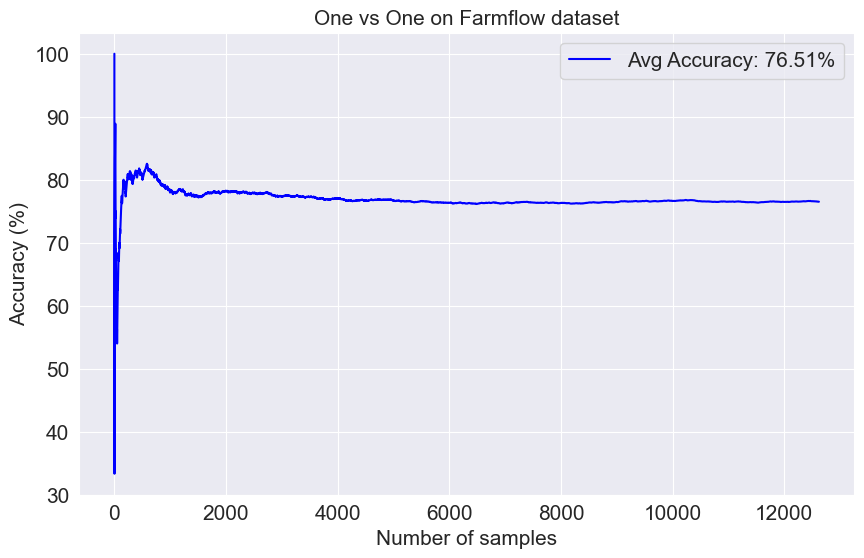

In [75]:
get_ipython().run_cell_magic('time', '', '\n# One-vs-One with Logistic Regression\nname = "One vs One"\nmodel = multiclass.OneVsOneClassifier(linear_model.LogisticRegression())\n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test)\nacc_fig(t, m, name)\n')


Warning detected at index 585
Warning detected at index 586
Warning detected at index 587
Warning detected at index 588
Warning detected at index 589
Warning detected at index 590
Warning detected at index 591
Warning detected at index 592
Warning detected at index 593
Warning detected at index 594
Warning detected at index 595
Warning detected at index 596
Warning detected at index 597
Warning detected at index 598
Warning detected at index 599
Warning detected at index 600
Warning detected at index 601
Warning detected at index 602
Warning detected at index 603
Warning detected at index 604
Warning detected at index 605
Warning detected at index 606
Warning detected at index 607
Warning detected at index 608
Warning detected at index 609
Warning detected at index 610
Warning detected at index 611
Warning detected at index 612
Warning detected at index 613
Warning detected at index 614
Warning detected at index 615
Warning detected at index 616
Warning detected at index 617
Warning de

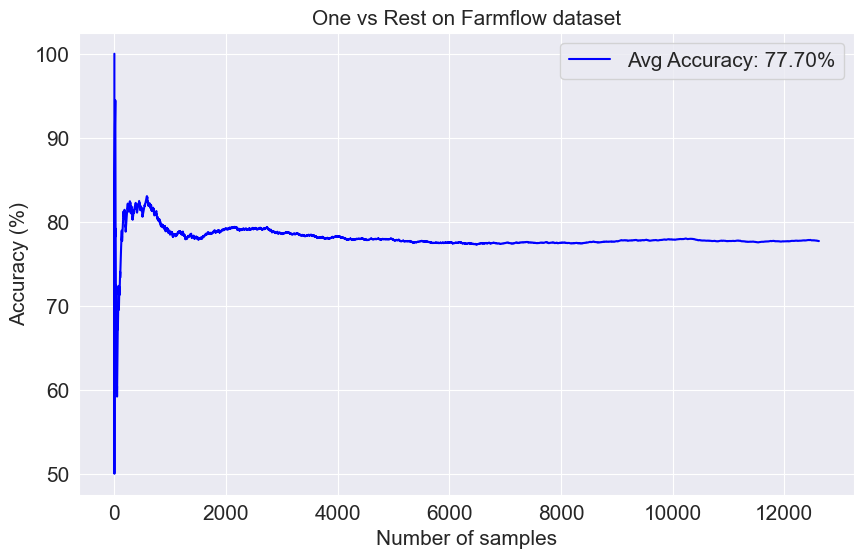

In [76]:
get_ipython().run_cell_magic('time', '', '# Use One vs Rest classifier model with ADWIN drift detector as a baseline model\nname = "One vs Rest"\n\n\nmodel=multiclass.OneVsRestClassifier(linear_model.LogisticRegression())\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')


Warning detected at index 600
Warning detected at index 601
Warning detected at index 602
Warning detected at index 603
Warning detected at index 604
Warning detected at index 605
Warning detected at index 606
Warning detected at index 607
Warning detected at index 608
Warning detected at index 609
Warning detected at index 610
Warning detected at index 611
Warning detected at index 612
Warning detected at index 613
Warning detected at index 614
Warning detected at index 615
Warning detected at index 616
Warning detected at index 617
Warning detected at index 618
Warning detected at index 619
Warning detected at index 620
Warning detected at index 621
Warning detected at index 622
Warning detected at index 623
Warning detected at index 624
Warning detected at index 625
Warning detected at index 626
Warning detected at index 627
Warning detected at index 628
Warning detected at index 629
Warning detected at index 630
Warning detected at index 631
Warning detected at index 632
Warning de

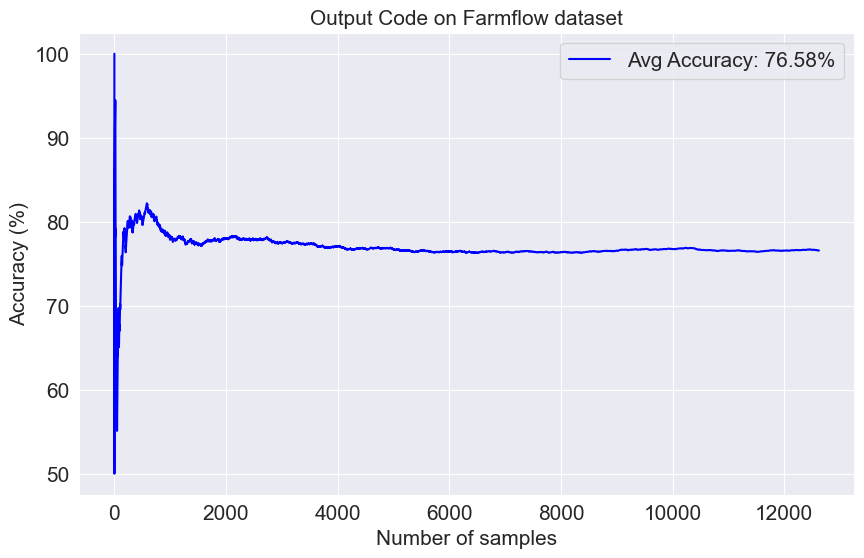

In [77]:
get_ipython().run_cell_magic('time', '', '# Output Code Classifier with Logistic Regression\nname = "Output Code"\nmodel = multiclass.OutputCodeClassifier(linear_model.LogisticRegression(),code_size=5)\n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test)\nacc_fig(t, m, name)\n')

